# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code and some require graphical results. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Chapter 2 of the textbook is based on a similar workflow to this assignment, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

## The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**STEP01:** 
Load the data set from the csv file (SeoulBikeData.csv) into a DataFrame, and summarise it with the pandas functions `describe()` and `info()`.

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

_Points:_ 2

In [2]:
data = pd.read_csv("SeoulBikeData.csv")
display(data.describe())
display(data.info())

# The following code is used by the autograder, don't change it
step1_sol = data.shape

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

None

grader.check("step01")

**STEP02:** To get a feeling for the data it is a good idea to do some form of simple visualisation. Display a set of histograms for the features as they are right now, prior to any cleaning steps.

_Points:_ 0

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature (C)'}>],
       [<Axes: title={'center': 'Humidity (%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature (C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>, <Axes: >]],
      dtype=object)

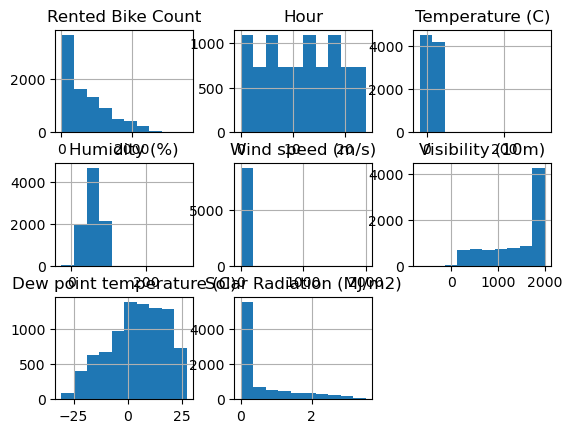

In [3]:
# Min: 0, Max: none
# display(data["Rented Bike Count"].hist())

# Min: 0, Max: 24
# display(data["Hour"].hist())

# Min: none, Max: 50
# display(data["Temperature (C)"].hist())

# Min: 0, Max: 100
# display(data["Humidity (%)"].hist())

# Min: 0, Max: 10
# display(data["Wind speed (m/s)"].hist())

# Min: 0, Max: none
# display(data["Visibility (10m)"].hist())

# Min: none, Max: none
# display(data["Dew point temperature (C)"].hist())

# Min: 0, Max: none
# display(data["Solar Radiation (MJ/m2)"].hist())
data.hist()

grader.check("step02")

**STEP03:** The "Functioning Day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so remove rows from the DataFrame where the business is closed. After doing this, delete the Functioning Day feature from the DataFrame and verify that this worked. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [4]:
data = data[data["Functioning Day"] == "Yes"]
display(data.info())
display((data["Functioning Day"] == "Yes").count())
data = data.drop("Functioning Day", axis="columns")
display(data.info())

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step3_data = data.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
 13  Functioning Day            8465 non-null   object 
dt

None

8465

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 925.

None

grader.check("step03")

**STEP04:** 
The goal is to predict bike rental demand using historical data. To achieve this, you will use regression techniques with "Bike Rental Count" as the target feature for this prediction, *but for this*, it is important that all other features in the data are numerical. Two of the features in the data, "Holiday" and "Season", need to be converted to numerical format. Write code to convert the "Holiday" feature to 0 or 1 from its current format. For the "Season" feature, add 4 new columns, labeled as "Winter", "Spring", "Summer", and "Autumn" then remove the "Season" column. Each of these columns should store a 0 or 1, depending on the corresponding season in each row. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [5]:
display(data.Holiday.value_counts())
data["Holiday"] = data["Holiday"].replace("No Holiday", 0)
data["Holiday"] = data["Holiday"].replace("Holiday", 1)
display(data.Holiday.value_counts())

# display(pd.get_dummies()
# data.get_dummies()
data["Winter"] = np.where(data["Seasons"] == "Winter", 1, 0)
data["Spring"] = np.where(data["Seasons"] == "Spring", 1, 0)
data["Summer"] = np.where(data["Seasons"] == "Summer", 1, 0)
data["Autumn"] = np.where(data["Seasons"] == "Autumn", 1, 0)
data = data.drop("Seasons", axis=True)
display(data.head())

# The following code is used by the autograder, don't change it
step4_data = data.copy()

Holiday
No Holiday    8057
Holiday        408
Name: count, dtype: int64

Holiday
0    8057
1     408
Name: count, dtype: int64

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,0,0


grader.check("step04")

**STEP05**: It is known that bike rentals depend strongly on whether it's a weekday or a weekend. Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [6]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)
data.Date = data.Date.dt.weekday
data.Date = np.where(data.Date > 4, 1, 0)
display(data.Date)

data["Weekday"] = data.Date
data = data.drop("Date", axis=True)
display(data.head())
display(data.Weekday.value_counts())

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step5_data
step5_data = data.copy()

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Date, Length: 8465, dtype: int32

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,0,0,0


Weekday
0    6024
1    2441
Name: count, dtype: int64

grader.check("step05")

**STEP06** Convert all the remaining data to numerical format, with any non-numerical entries set to NaN.

_Points:_ 3

In [7]:
data = data.apply(pd.to_numeric, errors="coerce")
# data.fillna()
display(data.info())

# The following code is used by the autograder
# make sure your variable that contains that DataFrame from this step is the one assigned to step6_data
step6_data = data.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   int64  
 4   Wind speed (m/s)           8464 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8464 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8440 non-null   float64
 9   Snowfall (cm)              8442 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Winter                     8465 non-null   int32  
 12  Spring                     8465 non-null   int32  
 13  Summer                     8465 non-null   int32  
 1

None

grader.check("step06")

**STEP07** Examin the data and identify problematic entries. Set any problematic values in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

_Points:_ 3

In [8]:
# Min: 0, Max: none
# display(data["Rented Bike Count"].hist())

# Min: 0, Max: 24
# display(data["Hour"].hist())

# Min: none, Max: 50
# display(data["Temperature (C)"].hist())

# Min: 0, Max: 100
# display(data["Humidity (%)"].hist())

# Min: 0, Max: 10
# display(data["Wind speed (m/s)"].hist())

# Min: 0, Max: none
# display(data["Visibility (10m)"].hist())

# Min: none, Max: none
# display(data["Dew point temperature (C)"].hist())

# Min: 0, Max: none
# display(data["Solar Radiation (MJ/m2)"].hist())

display(data.describe())

##### Now just have to expand the code below for all of the columns value limits
data["Rented Bike Count"] = data["Rented Bike Count"].mask(data["Rented Bike Count"] < 0, np.nan)
data["Hour"] = data["Hour"].mask(data["Hour"] < 0, np.nan)
data["Hour"] = data["Hour"].mask(data["Hour"] > 24, np.nan)
data["Temperature (C)"] = data["Temperature (C)"].mask(data["Temperature (C)"] > 50, np.nan)
data["Humidity (%)"] = data["Humidity (%)"].mask(data["Humidity (%)"] < 0, np.nan)
data["Humidity (%)"] = data["Humidity (%)"].mask(data["Humidity (%)"] > 100, np.nan)
data["Wind speed (m/s)"] = data["Wind speed (m/s)"].mask(data["Wind speed (m/s)"] < 0, np.nan)
data["Wind speed (m/s)"] = data["Wind speed (m/s)"].mask(data["Wind speed (m/s)"] > 10, np.nan)
data["Visibility (10m)"] = data["Visibility (10m)"].mask(data["Visibility (10m)"] < 0, np.nan)
data["Solar Radiation (MJ/m2)"] = data["Solar Radiation (MJ/m2)"].mask(data["Solar Radiation (MJ/m2)"] < 0, np.nan)

display(data.describe())
display(data.isna()["Humidity (%)"].value_counts())

# data = data.fillna(data.median())
# imputer = SimpleImputer(strategy="median")
# imputer.fit(data)
# data_np = imputer.transform(data)
# Transform data back from a numpy matrix into a pandas dataframe
# data = pd.DataFrame(data_np, columns=data.columns, index=data.index)
display(data.isna().value_counts())
display(data)

# keep the variable name pipeline_step7 as you will use it in STEP09
pipeline_step7 = Pipeline([
    ("impute", SimpleImputer(strategy="median"))
])

# The following code is used by the autograder
# make sure your variable that contains the solutions from this step is the one assigned to step7_data as follows
step7_data = [data.copy(),pipeline_step7]

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn,Weekday
count,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8465.000000,8464.000000,8465.000000,8440.000000,8442.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.509864,12.803591,58.161607,1.962169,1433.477141,3.945558,0.567868,0.149562,0.077896,0.048198,0.255168,0.255168,0.260839,0.228825,0.288364
std,642.351166,6.921101,12.515429,20.713601,21.744979,609.596083,13.243081,0.868245,1.127177,0.444649,0.214198,0.435982,0.435982,0.439118,0.420101,0.453028
min,2.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1689.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn,Weekday
count,8465.000000,8465.000000,8464.000000,8461.000000,8463.000000,8464.000000,8464.000000,8465.000000,8440.000000,8442.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.509864,12.768951,58.161328,1.726078,1433.726607,3.945558,0.567868,0.149562,0.077896,0.048198,0.255168,0.255168,0.260839,0.228825,0.288364
std,642.351166,6.921101,12.103538,20.478908,1.034324,609.199826,13.243081,0.868245,1.127177,0.444649,0.214198,0.435982,0.435982,0.439118,0.420101,0.453028
min,2.000000,0.000000,-17.800000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1689.500000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3556.000000,24.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Humidity (%)
False    8461
True        4
Name: count, dtype: int64

Rented Bike Count  Hour   Temperature (C)  Humidity (%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  Winter  Spring  Summer  Autumn  Weekday
False              False  False            False         False             False             False                      False                    False         False          False    False   False   False   False   False      8431
                                                                                                                                                 True          True           False    False   False   False   False   False        23
                                           True          False             False             False                      False                    False         False          False    False   False   False   False   False         4
                                           False         False             False    

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn,Weekday
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,0,1,0,0,0,0
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,0,1,0,0,0,0
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,0,1,0,0,0,0
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,0,1,0,0,0,0
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,0,0,0,0,1,0
8756,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,0,0,0,0,1,0
8757,694,21,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,0,0,0,0,1,0
8758,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,0,0,0,0,1,0


grader.check("step07")

**STEP08:** Generate a pre-processed version of the entire dataset by applying the pipeline defined in STEP07. Then, calculate the correlation of each feature with the target using either the pandas function corr() or numpy corrcoef() and find the 3 attributes that are the most correlated with bike rentals. 

_Points:_ 3

In [9]:
preprocessed_data = pipeline_step7.fit_transform(data)
# Getting column names and row indexes back from a numpy matrix to a pandas dataframe
preprocessed_data = pd.DataFrame(preprocessed_data, columns=pipeline_step7.get_feature_names_out(), index=data.index)

display(preprocessed_data.isna().value_counts())   


# top_3 should be an array of 3 strings ['attribute name', 'attribute name','attribute name']
corr_martix = preprocessed_data.corr()["Rented Bike Count"]
corr_martix = corr_martix.drop("Rented Bike Count", axis="index")
corr_martix = corr_martix.abs()
corr_martix = corr_martix.sort_values(ascending=False)
display(corr_martix)

top_3 = [corr_martix.index[0], corr_martix.index[1], corr_martix.index[2]]
print(top_3)
# The following code is used by the autograder
# make sure your variable that contains a list of the names of the top 3 attributes is assigned to step3_data
step8_data = top_3.copy()

Rented Bike Count  Hour   Temperature (C)  Humidity (%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  Winter  Spring  Summer  Autumn  Weekday
False              False  False            False         False             False             False                      False                    False         False          False    False   False   False   False   False      8465
Name: count, dtype: int64

Temperature (C)              0.562774
Winter                       0.458920
Hour                         0.425460
Dew point temperature (C)    0.400234
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210937
Humidity (%)                 0.201731
Autumn                       0.165333
Snowfall (cm)                0.151611
Rainfall(mm)                 0.128626
Wind speed (m/s)             0.125151
Holiday                      0.070070
Weekday                      0.046360
Spring                       0.015580
Name: Rented Bike Count, dtype: float64

['Temperature (C)', 'Winter', 'Hour']


grader.check("step08")

**STEP09:** Divide the data into training and test sets using where 20% of the data is kept for testing. Create a pipeline that includes the linear regression model in addition to the pipeline defined in STEP07. Fit the pipeline to the training set and calculate the `rmse` of the fit to evaluate its performance. As a comparison, compute the `rmse` that would be obtained by predicting the mean value of bike rentals for all training examples.

_Points:_ 3

In [10]:
# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step9
from sklearn.pipeline import make_pipeline

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# pipeline_step7.steps.append(("Linear Regression", LinearRegression()))
# pipeline_step9 = pipeline_step7
pipeline_step9 = make_pipeline(SimpleImputer(strategy="median"), LinearRegression())

y_train = train_set["Rented Bike Count"]
X_train = train_set.drop("Rented Bike Count", axis="columns")

y_test = test_set["Rented Bike Count"]
X_test = test_set.drop("Rented Bike Count", axis="columns")

pipeline_step9.fit(X=X_train,y=y_train)
y_predict = pipeline_step9.predict(X_test)

# calculate the RMSE of the fit to the training data
rmse_train = mean_squared_error(y_test, y_predict, squared=False)

display(y_train.mean())
y_mean = y_train
y_mean[0] = y_train.mean()

# calculate the RMSE of the baseline model (by predicting the mean value of bike rentals for all training examples)
y_baseline = pipeline_step9.predict(X_train)
display(y_baseline)
rmse_baseline = mean_squared_error(y_mean, y_baseline, squared=False)

print("RMSE for training data:", rmse_train)
print("RMSE for baseline (predicting mean):", rmse_baseline)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step9_data = [rmse_train,rmse_baseline]

731.3904311872416

C:\Users\nzac0\AppData\Local\Temp\ipykernel_18364\2577227844.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_mean[0] = y_train.mean()
C:\Users\nzac0\AppData\Local\Temp\ipykernel_18364\2577227844.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '731.3904311872416' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_mean[0] = y_train.mean()


array([ 663.08597201, 1146.79125061, 1160.17394756, ..., 1178.62786259,
        485.42993123,  660.61542116])

RMSE for training data: 416.90930933712326
RMSE for baseline (predicting mean): 437.3756714808183


c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

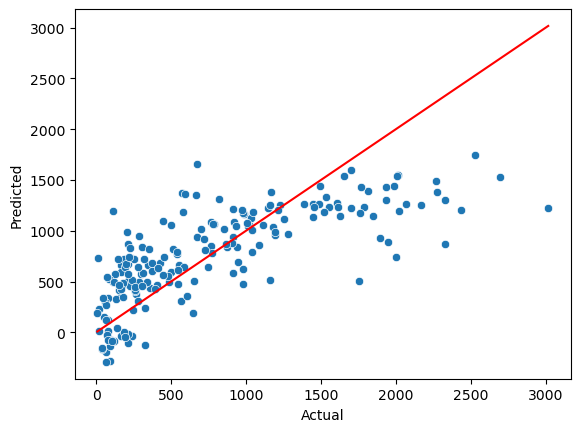

In [11]:
#The following code will show a visualisation of the fit for your linear regression.
# I will use your pipeline_step9 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step9.predict(X_train[:subset_size])

# Then I create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
# A perfect solution would look like the red line
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step09")

**STEP10:**  Fit a Kernel Ridge regression model (imported from sklearn.kernel_ridge) to the X_train data from STEP09. Build a new pipeline that includes the Kernel Ridge regression model in addition to the pipeline defined in STEP07, and fit it to the training data using default settings. Generate a scatter plot of the predicted values against the actual values for the training data, and calculate the RMSE of the fit to the training data.

_Points:_ 3

In [12]:
from sklearn.kernel_ridge import KernelRidge

# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step10
# pipeline_step10 = make_pipeline(pipeline_step7, KernelRidge())
# pipeline_step10 = make_pipeline(SimpleImputer(strategy="median"), KernelRidge())
pipeline_step10 = Pipeline([
    ("Impute", SimpleImputer(strategy="median")),
    ("kernelridge", KernelRidge())
])

# make predictions on the training data
pipeline_step10.fit(X=X_train,y=y_train)
y_pred_train_KR = pipeline_step10.predict(X_test)

# calculate rmse for training data
rmse_train_KR = mean_squared_error(y_test, y_pred_train_KR, squared=False)
print('Kernel Ridge model RMSE on training data:', rmse_train_KR)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step10_data = [rmse_train_KR,pipeline_step10]

Kernel Ridge model RMSE on training data: 416.6171446748695


c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

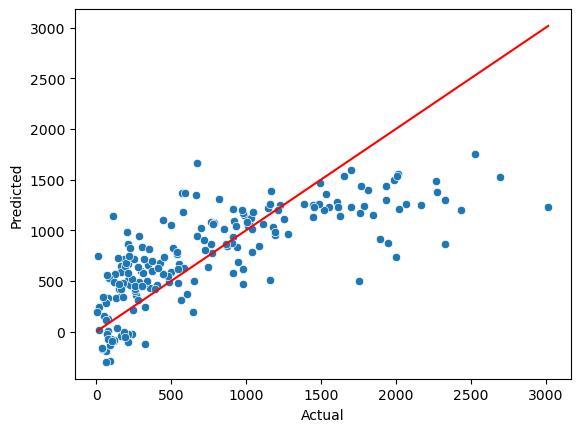

In [13]:
# I will use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step10.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step10")

**STEP11:** Fit a Support Vector Regression (from sklearn.svm import SVR). As you did for STEP10, create a new pipeline using the pipelinr from STEP07 and this model and fit it to your training data, using the default settings. Again, calculate the RMSE of the fit to the training data.

_Points:_ 4

In [14]:
from sklearn.svm import SVR

# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step11
# pipeline_step11 = make_pipeline(pipeline_step7, SVR())
pipeline_step11 = Pipeline([
    ("Impute", SimpleImputer(strategy="median")),
    ("SVR", SVR())
])
pipeline_step11.fit(X=X_train,y=y_train)

# make predictions on the training data
y_pred_train_SVR = pipeline_step11.predict(X_test)

# calculate rmse for training data
rmse_train_SVR = mean_squared_error(y_true=y_test, y_pred=y_pred_train_SVR, squared=False)
print('Support Vector Regression model RMSE on training data:', rmse_train_SVR)


# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step11_data = [rmse_train_SVR,pipeline_step11]

Support Vector Regression model RMSE on training data: 634.8482697923785


c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

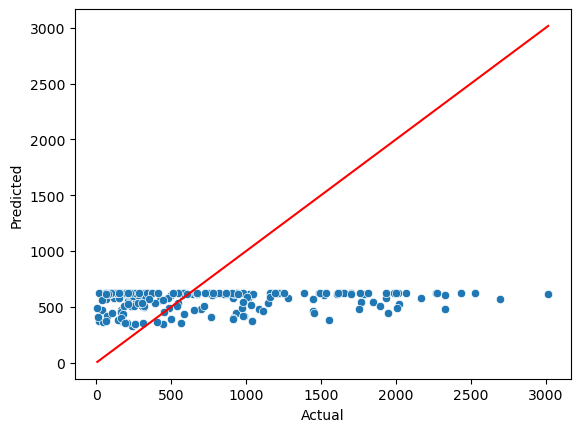

In [15]:
# use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step11.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step11")

**STEP12:** Perform a 10 fold cross validation for each of the three model (LinearRegression,KernelRidge,SVR). This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run. Find the mean and standard deviation of the rmse values obtained for each model for the validation splits.

_Points:_ 5

In [16]:
# you might need some or all of the following imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


#Linear Regression CV mean and std RMSE from the 10 folds:
rmses_LR = -cross_val_score(pipeline_step9, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
rmse_LR_mean = rmses_LR.mean()
rmse_LR_std  = rmses_LR.std()
display(rmses_LR)
print('Linear Regression CV Scores:') 
print(f'Mean: {rmse_LR_mean:.2f}, Std: {rmse_LR_std:.2f}\n')


#Linear Regression CV mean and std:
rmses_KR = -cross_val_score(pipeline_step10, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
rmse_KR_mean = rmses_KR.mean()
rmse_KR_std  = rmses_KR.std()
display(rmses_KR)
print('Kernel Ridge Regression CV Scores:') 
print(f'Mean: {rmse_KR_mean:.2f}, Std: {rmse_KR_std:.2f}\n')


#Linear Regression CV mean and std:
rmses_SVR = -cross_val_score(pipeline_step11, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
rmse_SVR_mean = rmses_SVR.mean()
rmse_SVR_std  = rmses_SVR.std()
display(rmses_SVR)
print('Support Vector Regression CV Scores:') 
print(f'Mean: {rmse_SVR_mean:.2f}, Std: {rmse_SVR_std:.2f}\n')


# The following code is used by the autograder
step12_data = [rmse_LR_mean,rmse_KR_mean,rmse_SVR_mean]

array([435.47001325, 444.7244859 , 444.91988607, 466.40214599,
       441.74437654, 419.06062863, 422.35593389, 460.88318712,
       424.71564273, 424.59495773])

Linear Regression CV Scores:
Mean: 438.49, Std: 15.50



array([435.72232883, 443.71588263, 444.53749883, 465.44696305,
       442.14476124, 419.30655647, 423.14466554, 461.22441255,
       425.03908432, 425.1304619 ])

Kernel Ridge Regression CV Scores:
Mean: 438.54, Std: 15.14



array([659.57885794, 678.29401551, 649.14706581, 676.6701966 ,
       662.81523357, 618.79128311, 649.92924359, 698.77571949,
       664.38046032, 627.35526904])

Support Vector Regression CV Scores:
Mean: 658.57, Std: 22.60



grader.check("step12")

**STEP13:** Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. Use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function GridSearchCV to do this.

For KernelRidge, vary the hyperparameter alpha. (note, if you are using KernelRidge as the last step in a pipeline, alpha is refered to as kernelridge__alpha) 

For SVR, vary the hyperparameter C. (note, if you are using SVR as the last step in a pipeline, C is refered to as SVR__C)

Find the hyperparameter setting for each medel.

Finally, train and apply both models, with the best hyperparameter settings, to the test set and report the performance as rmse.

_Points:_ 5

In [17]:
from sklearn.model_selection import GridSearchCV


# Define the GridSearchCV objects for each model
kr_param_grid = [
    {"kernelridge__alpha": [10, 100]}
]
kr_cv = GridSearchCV(pipeline_step10, kr_param_grid, cv=10, scoring="neg_root_mean_squared_error")

svr_param_grid = [
    {"SVR__C": [1000, 10000]}
]
svr_cv = GridSearchCV(pipeline_step11, svr_param_grid, cv=10, scoring="neg_root_mean_squared_error")

# Fit the GridSearchCV objects to the training data
kr_cv.fit(X_train, y_train)
svr_cv.fit(X_train, y_train)

# Print the best hyperparameter setting for each model
print("Best hyperparameter setting for Kernel Ridge Regression:", kr_cv.best_params_)
print("Best hyperparameter setting for Support Vector Regression:", svr_cv.best_params_)

# Create pipeline using the best hyperparameter
pipeline_best_kr = make_pipeline(pipeline_step7, KernelRidge(alpha=kr_cv.best_params_["kernelridge__alpha"]))
pipeline_best_svr = make_pipeline(pipeline_step7, SVR(C=svr_cv.best_params_["SVR__C"]))

# Train and apply the chosen model to the test set
pipeline_best_kr.fit(X_train, y_train)
kr_predictions = pipeline_best_kr.predict(X_test)
kr_rmse = mean_squared_error(y_test, kr_predictions, squared=False)

pipeline_best_svr.fit(X_train, y_train)
svr_predictions = pipeline_best_svr.predict(X_test)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

print("Kernel Ridge Regression RMSE on test set:", kr_rmse)
print("Support Vector Regression RMSE on test set:", svr_rmse)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step13_data = [kr_rmse , svr_rmse, kr_cv , svr_cv,pipeline_best_kr,pipeline_best_svr]

Best hyperparameter setting for Kernel Ridge Regression: {'kernelridge__alpha': 10}
Best hyperparameter setting for Support Vector Regression: {'SVR__C': 10000}
Kernel Ridge Regression RMSE on test set: 416.69511832688534
Support Vector Regression RMSE on test set: 442.70386439380667


c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nzac0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

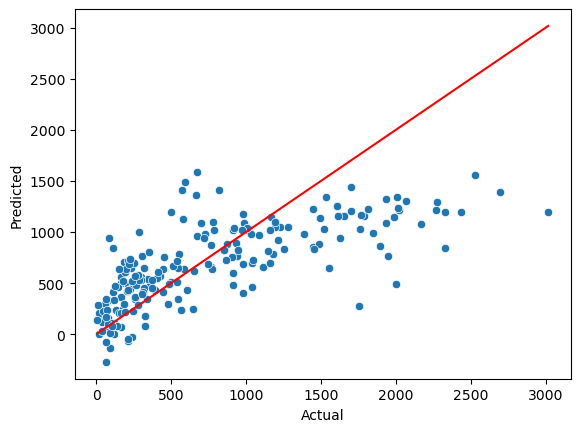

In [18]:
# use your pipeline_best_svr to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_best_svr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step13")